# UV difference

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pwd

'/home/anvar/Dev/Raman/Publication'

## UV spectra

In [6]:
# Read data from csv file
# 1st column: wavelength
# 2nd column: absorption

data_batch1 = np.genfromtxt('uv_batch_1.csv', delimiter=',')
data_batch2 = np.genfromtxt('uv_batch_2.csv', delimiter=',')
data_batch3 = np.genfromtxt('uv_batch_3.csv', delimiter=',')

wavelength, batch1 = data_batch1[:,0], data_batch1[:,1]
_, batch2 = data_batch2[:,0], data_batch2[:,1]
_, batch3 = data_batch3[:,0], data_batch3[:,1]

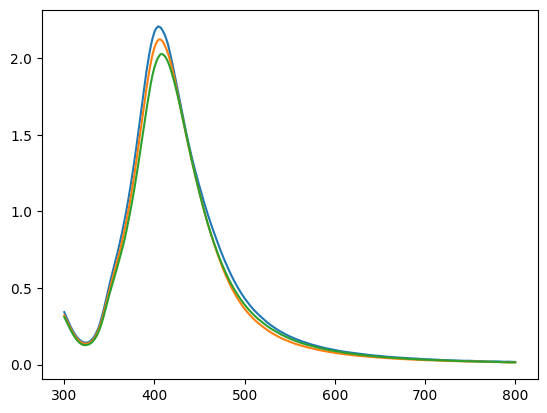

In [7]:
plt.plot(wavelength, batch1, label='Batch 1')
plt.plot(wavelength, batch2, label='Batch 2')
plt.plot(wavelength, batch3, label='Batch 3')

## Finding the UV difference

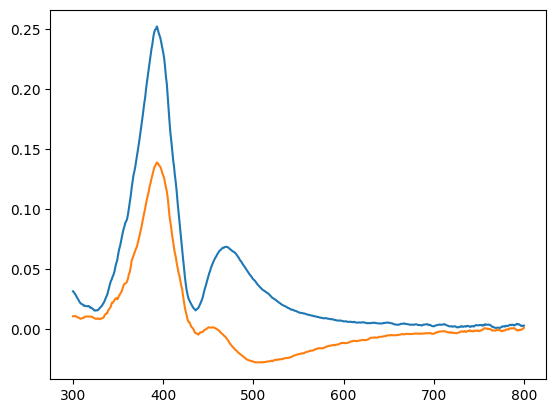

In [8]:
# Take batch3 as reference
diff_batch1 = batch1 - batch3
diff_batch2 = batch2 - batch3

plt.plot(wavelength, diff_batch1, label='Batch 1 - Batch 3')
plt.plot(wavelength, diff_batch2, label='Batch 2 - Batch 3')

In [10]:
# Save the difference data into two csv files
# 1st column: wavelength
# 2nd column: absorption_diff

data_diff_batch1 = np.column_stack((wavelength, diff_batch1))
data_diff_batch2 = np.column_stack((wavelength, diff_batch2))

# Give names to the columns
data_diff_batch1 = np.vstack((['wavelength', 'absorption_diff'], data_diff_batch1))
data_diff_batch2 = np.vstack((['wavelength', 'absorption_diff'], data_diff_batch2))

np.savetxt('uv_batch_1_diff.csv', data_diff_batch1, delimiter=',', fmt='%s')
np.savetxt('uv_batch_2_diff.csv', data_diff_batch2, delimiter=',', fmt='%s')

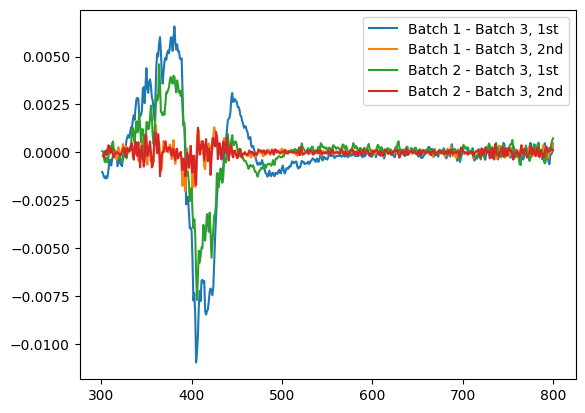

In [9]:
# Take the 1st and 2nd derivative of the difference
diff_batch1_1st = np.gradient(diff_batch1, wavelength)
diff_batch1_2nd = np.gradient(diff_batch1_1st, wavelength)

diff_batch2_1st = np.gradient(diff_batch2, wavelength)
diff_batch2_2nd = np.gradient(diff_batch2_1st, wavelength)

plt.plot(wavelength, diff_batch1_1st, label='Batch 1 - Batch 3, 1st')
plt.plot(wavelength, diff_batch1_2nd, label='Batch 1 - Batch 3, 2nd')

plt.plot(wavelength, diff_batch2_1st, label='Batch 2 - Batch 3, 1st')
plt.plot(wavelength, diff_batch2_2nd, label='Batch 2 - Batch 3, 2nd')

plt.legend()
plt.show()

In [11]:
# Take the 1st and 2nd derivative of the UV spectra

batch1_1st = np.gradient(batch1, wavelength)
batch1_2nd = np.gradient(batch1_1st, wavelength)

batch2_1st = np.gradient(batch2, wavelength)
batch2_2nd = np.gradient(batch2_1st, wavelength)

batch3_1st = np.gradient(batch3, wavelength)
batch3_2nd = np.gradient(batch3_1st, wavelength)

In [ ]:
# Save the 1st and 2nd derivative data into three csv files
# 1st column: wavelength
# 2nd column: absorption_1st
# 3rd column: absorption_2nd

data_batch1 = np.column_stack((wavelength, batch1_1st, batch1_2nd))
data_batch2 = np.column_stack((wavelength, batch2_1st, batch2_2nd))
data_batch3 = np.column_stack((wavelength, batch3_1st, batch3_2nd))

# Give names to the columns
data_batch1 = np.vstack((['wavelength', 'absorption_1st', 'absorption_2nd'], data_batch1))
data_batch2 = np.vstack((['wavelength', 'absorption_1st', 'absorption_2nd'], data_batch2))
data_batch3 = np.vstack((['wavelength', 'absorption_1st', 'absorption_2nd'], data_batch3))

np.savetxt('uv_batch_1_deriv.csv', data_batch1, delimiter=',', fmt='%s')
np.savetxt('uv_batch_2_deriv.csv', data_batch2, delimiter=',', fmt='%s')
np.savetxt('uv_batch_3_deriv.csv', data_batch3, delimiter=',', fmt='%s')

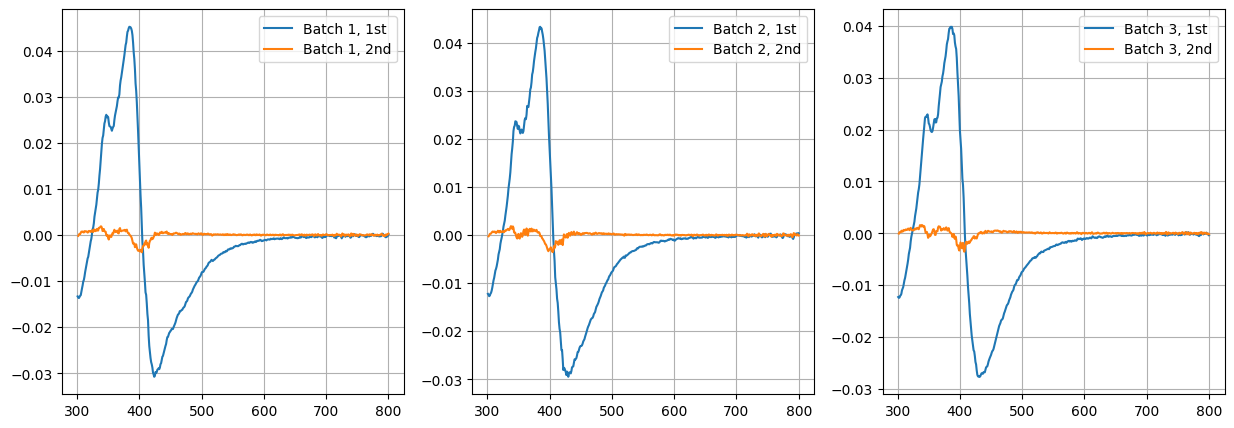

In [14]:
# Plot the 1st and 2nd derivative of the UV batch1

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(wavelength, batch1_1st, label='Batch 1, 1st')
plt.plot(wavelength, batch1_2nd, label='Batch 1, 2nd')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(wavelength, batch2_1st, label='Batch 2, 1st')
plt.plot(wavelength, batch2_2nd, label='Batch 2, 2nd')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(wavelength, batch3_1st, label='Batch 3, 1st')
plt.plot(wavelength, batch3_2nd, label='Batch 3, 2nd')
plt.grid()
plt.legend()

plt.show()

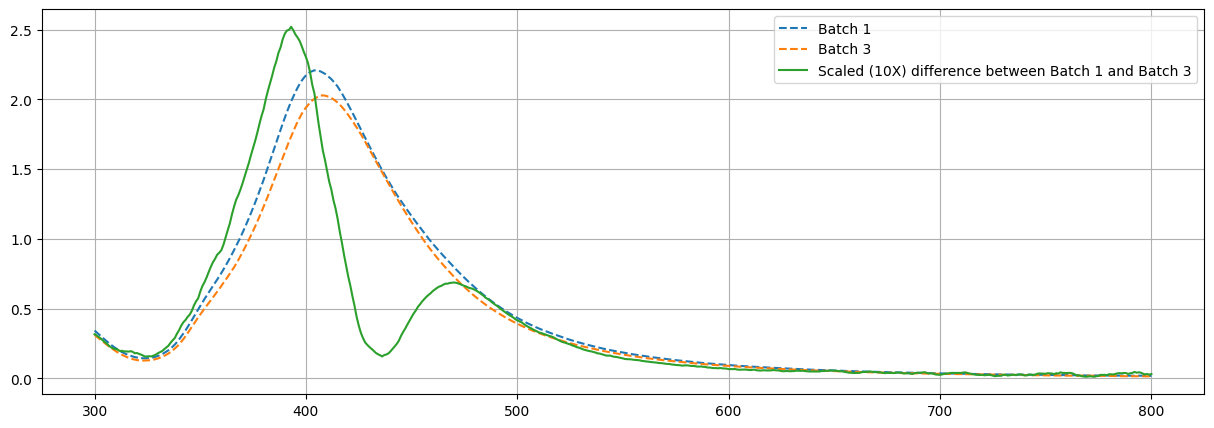

In [19]:
# Plot the UV spectra of batch 1 and 3 using dash line
# Then plot the difference between batch 1 and 3

plt.figure(figsize=(15, 5))
plt.plot(wavelength, batch1, label='Batch 1', linestyle='--')
plt.plot(wavelength, batch3, label='Batch 3', linestyle='--')
plt.plot(wavelength, 10 * (batch1 - batch3), label='Scaled (10X) difference between Batch 1 and Batch 3')
plt.grid()
plt.legend()
plt.show()

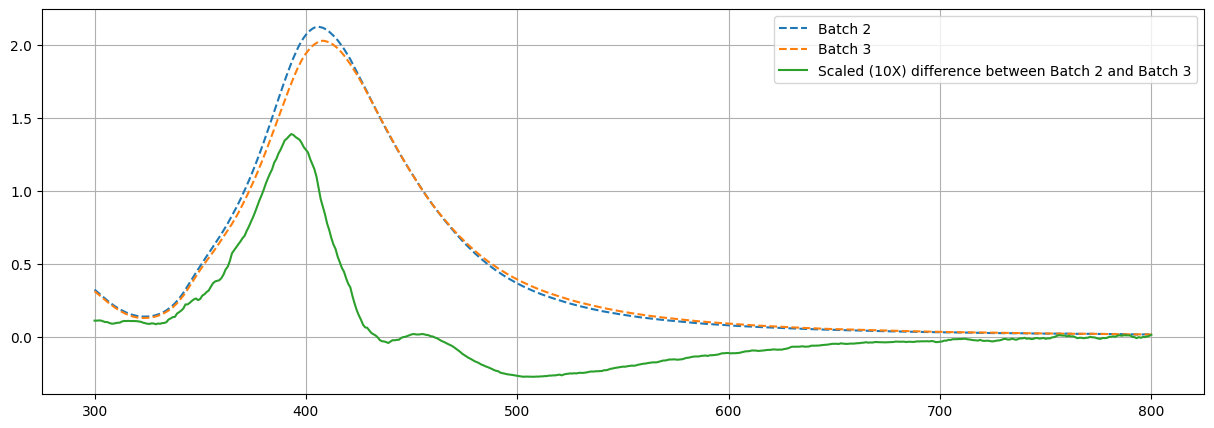

In [20]:
# Plot the UV spectra of batch 2 and 3 using dash line
# Then plot the difference between batch 2 and 3

plt.figure(figsize=(15, 5))
plt.plot(wavelength, batch2, label='Batch 2', linestyle='--')
plt.plot(wavelength, batch3, label='Batch 3', linestyle='--')
plt.plot(wavelength, 10 * (batch2 - batch3), label='Scaled (10X) difference between Batch 2 and Batch 3')
plt.grid()
plt.legend()
plt.show()